In [22]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt
from itertools import groupby
from shutil import which
import os
import re as re

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(f"Current machine: {socket_name}")
if socket_name == "DESKTOP-5RJD9NC":
    path = "/gitProjects/covid19_data"   # The Path on Harald's machine
if socket_name.startswith("compute-"):
    print("HSM Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/covid19_data/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)
rcParams['axes.linewidth'] = 0.2  # Set the Default Size of the Boundary for small 2.25in width figures
### Check whether required bins are available

req_bins = ["mafft"] 
for b in req_bins:
    s = which(b)
    if not s:
        print(f"Make sure to install {b} and have in path. I cannot find it!")
        
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

Current machine: compute-a-16-161.o2.rc.hms.harvard.edu
HSM Computational partition detected.
/n/groups/reich/hringbauer/git/covid19_data


# Plot Allele Frequencies along the Genome

In [2]:
savepath = "./output/tables/allele_spectrum.tsv"
df1 = pd.read_csv(savepath, sep="\t")
print(f"Loaded {len(df1)} Loci Statistics from {savepath}")

Loaded 29903 Loci Statistics from ./output/tables/allele_spectrum.tsv


Saved to ./figures/dumpster/maf_genome.png


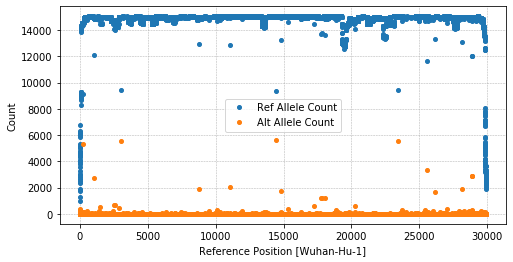

In [14]:
savepath="./figures/dumpster/maf_genome.png"
xlim = []

plt.figure(figsize=(8,4))
ax=plt.gca()
ax.plot(df1["refcount"], "o", label="Ref Allele Count", ms=4)
ax.plot(df1["altcount"], "o", label="Alt Allele Count", ms=4)
ax.set_xlabel("Reference Position [Wuhan-Hu-1]")
ax.set_ylabel("Count")
ax.legend(loc="center")
ax.grid(linestyle='--', lw=0.5)
if len(xlim)>0:
    ax.set_xlim(xlim)
if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved to {savepath}")
plt.show()

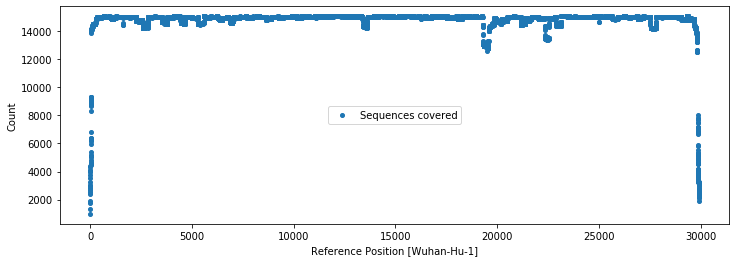

In [4]:
savepath=""
xlim = []

plt.figure(figsize=(12,4))
ax=plt.gca()
ax.plot(df1["refcount"]+df1["altcount"], "o", label="Sequences covered", ms=4)
ax.set_xlabel("Reference Position [Wuhan-Hu-1]")
ax.set_ylabel("Count")
ax.legend(loc="center")
if len(xlim)>0:
    ax.set_xlim(xlim)
if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved to {savepath}")
plt.show()

### Plot Allele Frequency Spectrum

In [11]:
var_path = "./output/tables/variant_maf.tsv"
df_var = pd.read_csv(var_path, sep="\t")
print(f"Loaded {len(df_var)} Variants")

Loaded 49 Variants


Saved to ./figures/dumpster/maf.png


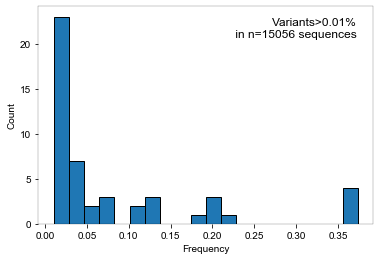

In [27]:
savepath="./figures/dumpster/maf.png"

plt.figure()
ax=plt.gca()
ax.hist(df_var["maf"], ec="k", bins=20)
ax.set_xlabel("Frequency")
ax.set_ylabel("Count")
#ax.set_title()
label = f"Variants>0.01%\n in n=15056 sequences"

ax.text(0.95, 0.95, label, horizontalalignment='right',
        verticalalignment='top', transform=ax.transAxes, fontsize=12)


if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved to {savepath}")

plt.show()

# Area 51

In [28]:
len(df_var)

49